In [3]:
import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

In [2]:
#References:
#Hayes, K. (2019, July 21). Tracking the international space station: A mini project with GeoPandas. Medium. Retrieved July 13, 2022, from https://medium.com/@katehayes.m51/tracking-the-international-space-station-a-mini-project-with-geopandas-e682e8a3489f 
#Open. (n.d.). Retrieved July 13, 2022, from http://api.open-notify.org/iss-now.json 

# Start of Code
# Create a loop to get the info needed

ISS_loc = []
count = 0
while count <= 130:    
    # ISS API Link
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    
    # Check status code for an appropriate response fromt the API
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
       
        resp = response.json()
    
        ISS_loc.append(resp)

        time.sleep(5)
     
        count = count + 1

In [4]:
# Check the data from the link
ISS_loc[:5]

[{'timestamp': 1657642101,
  'message': 'success',
  'iss_position': {'latitude': '48.6245', 'longitude': '153.7048'}},
 {'timestamp': 1657642107,
  'message': 'success',
  'iss_position': {'latitude': '48.5009', 'longitude': '154.1872'}},
 {'timestamp': 1657642112,
  'message': 'success',
  'iss_position': {'latitude': '48.3867', 'longitude': '154.6233'}},
 {'timestamp': 1657642118,
  'message': 'success',
  'iss_position': {'latitude': '48.2473', 'longitude': '155.1439'}},
 {'timestamp': 1657642123,
  'message': 'success',
  'iss_position': {'latitude': '48.1292', 'longitude': '155.5754'}}]

In [5]:
ISS_loc

[{'timestamp': 1657642101,
  'message': 'success',
  'iss_position': {'latitude': '48.6245', 'longitude': '153.7048'}},
 {'timestamp': 1657642107,
  'message': 'success',
  'iss_position': {'latitude': '48.5009', 'longitude': '154.1872'}},
 {'timestamp': 1657642112,
  'message': 'success',
  'iss_position': {'latitude': '48.3867', 'longitude': '154.6233'}},
 {'timestamp': 1657642118,
  'message': 'success',
  'iss_position': {'latitude': '48.2473', 'longitude': '155.1439'}},
 {'timestamp': 1657642123,
  'message': 'success',
  'iss_position': {'latitude': '48.1292', 'longitude': '155.5754'}},
 {'timestamp': 1657642129,
  'message': 'success',
  'iss_position': {'latitude': '47.9972', 'longitude': '156.0476'}},
 {'timestamp': 1657642134,
  'message': 'success',
  'iss_position': {'latitude': '47.8632', 'longitude': '156.5173'}},
 {'timestamp': 1657642140,
  'message': 'success',
  'iss_position': {'latitude': '47.7269', 'longitude': '156.9845'}},
 {'timestamp': 1657642145,
  'message': 

In [6]:
# Initialize empy dictionary ( will becoem the ISS dataframe)
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
# Initialize empty lists to populate with values from the API
lat_list = []
long_list = []
time_list = []

# Loop through the API list and extract latitude, longitude, and timestamp
for i in range(0,len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])

# Populate ISS dictionary
ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

# Turn the ISS position dictionary into a data frame 
ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [8]:
# Inspect ISS dataframe 
ISS_df.head(10)

,latitude,longitude,timestamp
0,48.6245,153.7048,1657642101
1,48.5009,154.1872,1657642107
2,48.3867,154.6233,1657642112
3,48.2473,155.1439,1657642118
4,48.1292,155.5754,1657642123
5,47.9972,156.0476,1657642129
6,47.8632,156.5173,1657642134
7,47.7269,156.9845,1657642140
8,47.5886,157.4491,1657642145
9,47.4483,157.9111,1657642151


In [9]:
# Change values to integers from strings
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)

In [10]:
# Make a coordinates column that has a value of a list of longitude and latitude
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [11]:
# Make the coordinate column a Point object
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)

In [12]:
# Inspect the ISS_df
ISS_df.head(10)

,latitude,longitude,timestamp,coordinates
0,48.6245,153.7048,1.657642e+09,POINT (153.7048 48.6245)
1,48.5009,154.1872,1.657642e+09,POINT (154.1872 48.5009)
2,48.3867,154.6233,1.657642e+09,POINT (154.6233 48.3867)
3,48.2473,155.1439,1.657642e+09,POINT (155.1439 48.2473)
4,48.1292,155.5754,1.657642e+09,POINT (155.5754 48.1292)
5,47.9972,156.0476,1.657642e+09,POINT (156.0476 47.9972)
6,47.8632,156.5173,1.657642e+09,POINT (156.5173 47.8632)
7,47.7269,156.9845,1.657642e+09,POINT (156.9845 47.7269)
8,47.5886,157.4491,1.657642e+09,POINT (157.4491 47.5886)
9,47.4483,157.9111,1.657642e+09,POINT (157.9111 47.4483)


In [13]:
# Convert Geopandas
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_ISS))
geo_ISS.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,latitude,longitude,timestamp,coordinates
0,48.6245,153.7048,1.657642e+09,POINT (153.70480 48.62450)
1,48.5009,154.1872,1.657642e+09,POINT (154.18720 48.50090)
2,48.3867,154.6233,1.657642e+09,POINT (154.62330 48.38670)
3,48.2473,155.1439,1.657642e+09,POINT (155.14390 48.24730)
4,48.1292,155.5754,1.657642e+09,POINT (155.57540 48.12920)


In [14]:
geo_ISS.to_csv('Geo_ISS_df')

In [16]:
# Read in the geojson file 
earth = geopandas.read_file("custom.geo.json")
earth.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ..."
1,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,"MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ..."
2,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."
3,1,Admin-0 country,3,Cuba,CUB,0,2,Sovereign country,Cuba,CUB,...,Americas,Caribbean,Latin America & Caribbean,4,4,4,-99,1,CUB.geojson,"POLYGON ((-82.26815 23.18861, -81.40446 23.117..."
4,1,Admin-0 country,5,Dominican Republic,DOM,0,2,Sovereign country,Dominican Republic,DOM,...,Americas,Caribbean,Latin America & Caribbean,14,18,9,-99,1,DOM.geojson,"POLYGON ((-71.71236 19.71446, -71.58730 19.884..."


In [17]:
# Observe the earth geodataframe
earth.describe

<bound method NDFrame.describe of      scalerank       featurecla  labelrank          sovereignt sov_a3  \
0            1  Admin-0 country          4         The Bahamas    BHS   
1            1  Admin-0 country          2              Canada    CAN   
2            1  Admin-0 country          6              Belize    BLZ   
3            1  Admin-0 country          3                Cuba    CUB   
4            1  Admin-0 country          5  Dominican Republic    DOM   
..         ...              ...        ...                 ...    ...   
170          1  Admin-0 country          3              France    FR1   
171          1  Admin-0 country          2         New Zealand    NZ1   
172          1  Admin-0 country          2    Papua New Guinea    PNG   
173          1  Admin-0 country          3     Solomon Islands    SLB   
174          1  Admin-0 country          4             Vanuatu    VUT   

     adm0_dif  level               type               admin adm0_a3  ...  \
0           0

In [19]:
# Checking of Earth's Shape
earth.shape

(175, 65)

<AxesSubplot:>

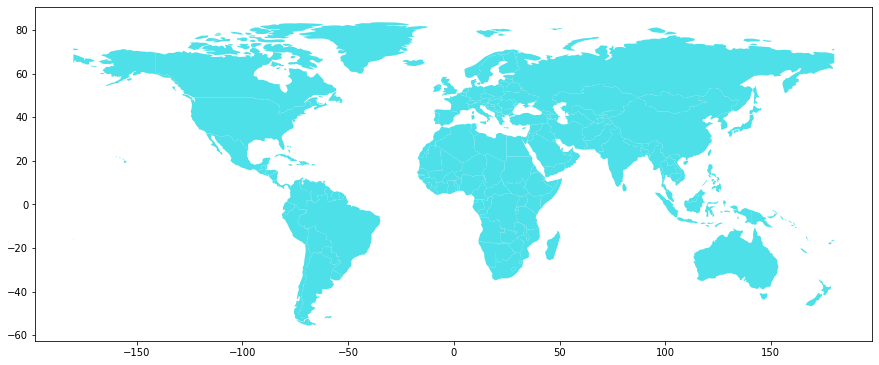

In [20]:
# Geojson Polygon objects
earth.plot(figsize=(15,10), color='#4DE0E8')

<AxesSubplot:>

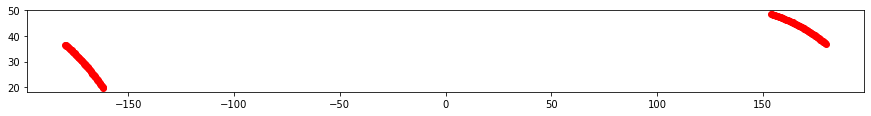

In [23]:
#Plot the ISS Path for reference
geo_ISS.plot(figsize=(15,10), color='r')

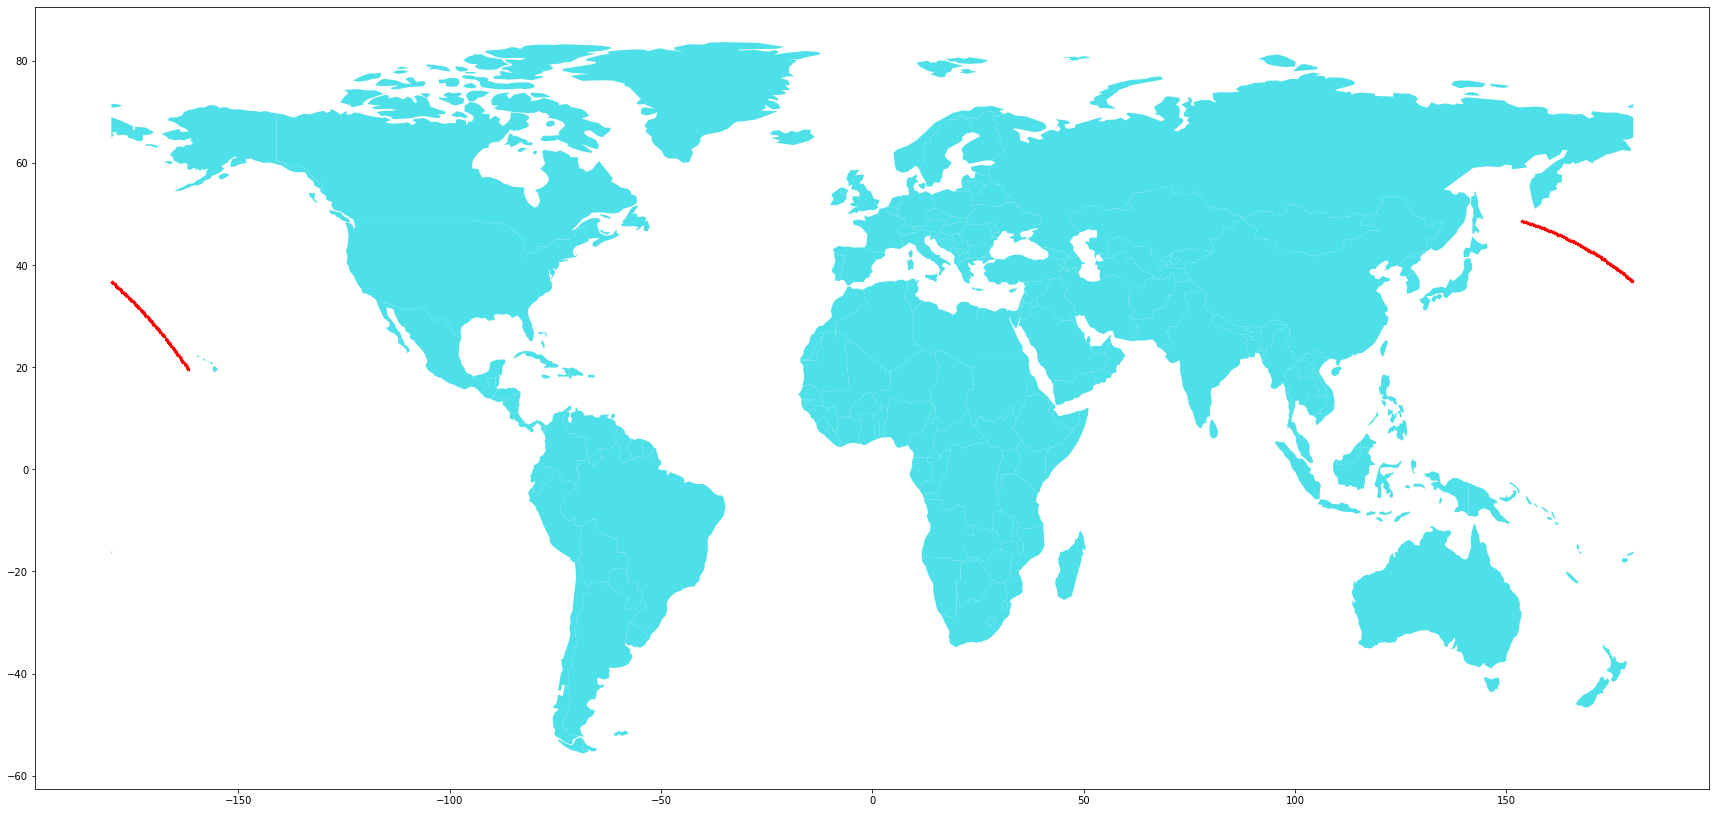

In [27]:
# Putting all components together
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#4DE0E8')

geo_ISS.plot(ax=base, color='r', marker="*", markersize=10);